<a href="https://colab.research.google.com/github/Rudrajit12/EDA_Projects/blob/main/EDA_on_Automobiles_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<u>Exploratory Data Analysis on Automobiles Dataset</u>**

### The automobiles dataset contains information about automobiles of different models with their different features inbuilt along with their prices. 

### We need to explore the dataset and visualize few features to derive insights from it.

* The dataset contains 205 entries with features like make, fuel type, aspiration, body type, engine type, num of doors, horsepower, mileage, price etc.

In [1]:
# import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# reading the dataset
auto_df = pd.read_csv('/content/drive/My Drive/AlmaBetter Data Science/Module 1/Pandas Operations/automobile_data.csv')
auto_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


### **1. Do a basic inspection of the dataset**

In [4]:
auto_df.shape

(205, 26)

In [5]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

There are no null values present in the dataset but there are some features marked with '?' or values which doesn't make sense.

In [6]:
auto_df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


### **2. Do some basic cleaning of the dataset and replace the abrupt values present in some columns**

In [7]:
# replace the '?' with NaN
auto_df.replace('?', np.NaN, inplace=True)
auto_df.replace('n.a', np.NaN, inplace=True)
auto_df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,NaN


In [8]:
# mean imputation for the missing values in the price column
auto_df['price'] = pd.to_numeric(auto_df['price'], downcast="float")
auto_df['price'].replace(np.NaN, auto_df['price'].mean(), inplace=True)
auto_df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000000
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000000
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000000
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950.000000
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450.000000
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250.000000
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710.000000
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920.000000
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875.000000
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,13207.128906


### **3. Find out the most expensive car and it's make. Also print the price of the most expensive car**

In [9]:
# most expensive car
expensive_car = auto_df[auto_df['price'] == auto_df['price'].max()]
expensive_car[['make','price']]

,make,price
74,mercedes-benz,45400.0


### **4. Plot the top 5 expensive and affordable car manufacturers with it's average price**

make
jaguar           34600.000000
mercedes-benz    33647.000000
porsche          27761.826172
bmw              26118.750000
volvo            18063.181641
Name: price, dtype: float32


Text(0, 0.5, 'Car Manufacturers')

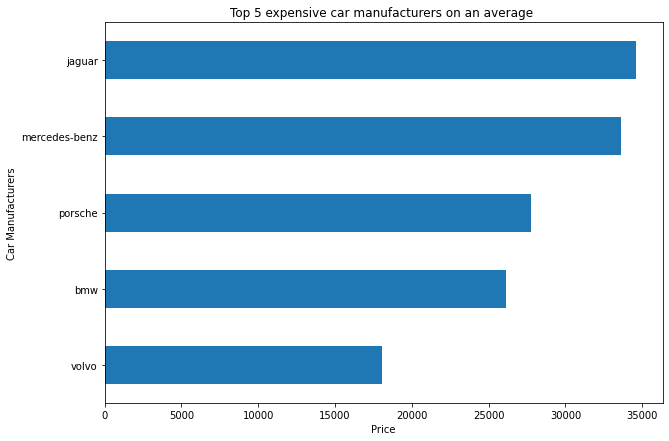

In [25]:
# top 5 expensive car manufacturers in average
car_makers = auto_df.groupby('make')
expensive_makers = car_makers['price'].mean()
top_5_expensive = expensive_makers.sort_values(ascending=False)[:5]
print(top_5_expensive)

# plot the top 5 expensive car manufacturers on an average
top_5_expensive.plot(kind='barh', figsize=(10,7)).invert_yaxis()
plt.title('Top 5 expensive car manufacturers on an average ')
plt.xlabel('Price')
plt.ylabel('Car Manufacturers')

make
chevrolet    6007.000000
dodge        7875.444336
plymouth     7963.428711
honda        8184.692383
subaru       8541.250000
Name: price, dtype: float32


Text(0, 0.5, 'Car Manufacturers')

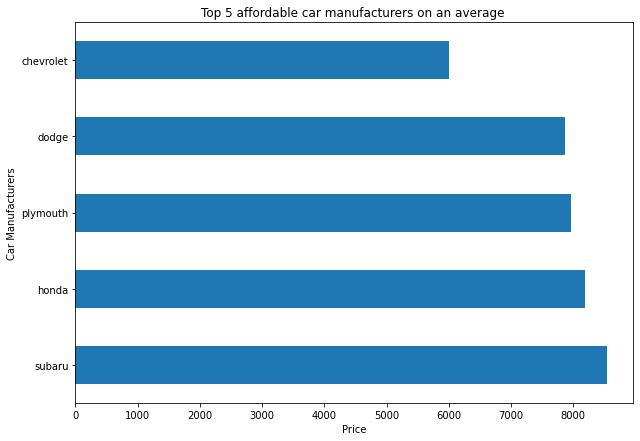

In [26]:
# top 5 affordable car manufacturers in average
car_makers = auto_df.groupby('make')
affordable_makers = car_makers['price'].mean()
top_5_affordable = affordable_makers.sort_values(ascending=True)[:5]
print(top_5_affordable)

# plot the top 5 affordable car manufacturers on an average
top_5_affordable.plot(kind='barh', figsize=(10,7)).invert_yaxis()
plt.title('Top 5 affordable car manufacturers on an average ')
plt.xlabel('Price')
plt.ylabel('Car Manufacturers')

* Jaguar and Mercedes-benz brands are in general make the most expensive models on an average.

* Chevrolet and Dodge on an average make the most affordable cars.

### **5. Calculate the maximum horsepowers, city mileage and highway mileage for each company**

make
alfa-romero      154.0
audi             160.0
bmw              182.0
chevrolet         70.0
dodge            145.0
honda            101.0
isuzu             90.0
jaguar           262.0
mazda            135.0
mercedes-benz    184.0
mercury          175.0
mitsubishi       145.0
nissan           200.0
peugot           142.0
plymouth         145.0
porsche          288.0
renault            NaN
saab             160.0
subaru           111.0
toyota           161.0
volkswagen       110.0
volvo            162.0
Name: horsepower, dtype: float32


Text(0, 0.5, 'Horsepower')

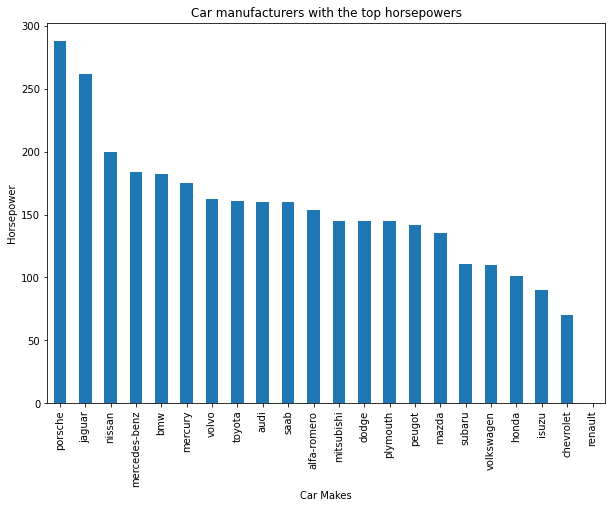

In [30]:
# maximum horsepower
auto_df['horsepower'] = pd.to_numeric(auto_df['horsepower'], downcast="float")
car_make = auto_df.groupby('make')
hp = car_make['horsepower'].max()
print(hp)
top_hp = hp.sort_values(ascending=False)

# plot the top horsepowers
top_hp.plot(kind='bar', figsize=(10,7))
plt.title('Car manufacturers with the top horsepowers')
plt.xlabel('Car Makes')
plt.ylabel('Horsepower')

* Jaguar and Porsche builds the most powerful cars and chevrolet makes the least powerful cars.

make
alfa-romero      21
audi             24
bmw              23
chevrolet        47
dodge            37
honda            49
isuzu            38
jaguar           15
mazda            36
mercedes-benz    22
mercury          19
mitsubishi       37
nissan           45
peugot           28
plymouth         37
porsche          19
renault          23
saab             21
subaru           32
toyota           38
volkswagen       37
volvo            26
Name: city-mpg, dtype: int64


Text(0, 0.5, 'City Mileage')

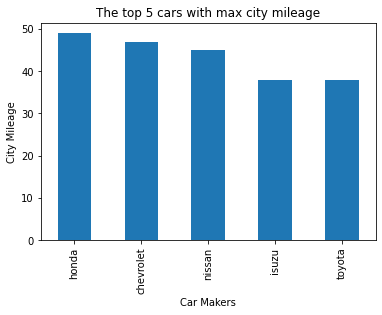

In [32]:
# maximum city mileage
city_mileage = car_make['city-mpg'].max()
print(city_mileage)
top_5 = city_mileage.sort_values(ascending=False)[:5]

# plot the top mileage cars
top_5.plot(kind='bar')
plt.title("The top 5 cars with max city mileage")
plt.xlabel("Car Makers")
plt.ylabel("City Mileage")

make
alfa-romero      27
audi             30
bmw              29
chevrolet        53
dodge            41
honda            54
isuzu            43
jaguar           19
mazda            42
mercedes-benz    25
mercury          24
mitsubishi       41
nissan           50
peugot           33
plymouth         41
porsche          28
renault          31
saab             28
subaru           37
toyota           47
volkswagen       46
volvo            28
Name: highway-mpg, dtype: int64


Text(0, 0.5, 'Highway Mileage')

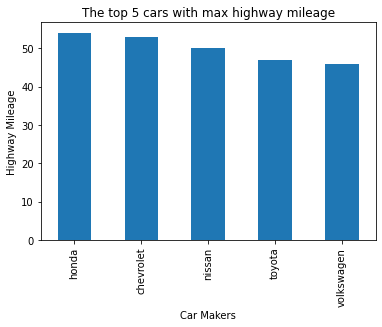

In [33]:
# maximum highway mileage
highway_mileage = car_make['highway-mpg'].max()
print(highway_mileage)
top_5 = highway_mileage.sort_values(ascending=False)[:5]

# plot the top 5 cars with max highway mileage
top_5.plot(kind='bar')
plt.title("The top 5 cars with max highway mileage")
plt.xlabel("Car Makers")
plt.ylabel("Highway Mileage")

* Chevrolet, Honda and Nissan are the most fuel efficient car manufacturers under city and highway driving conditions.

### **6. Find out the total number of cars manufactured by each company**

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64


Text(0, 0.5, 'Total Number of Cars')

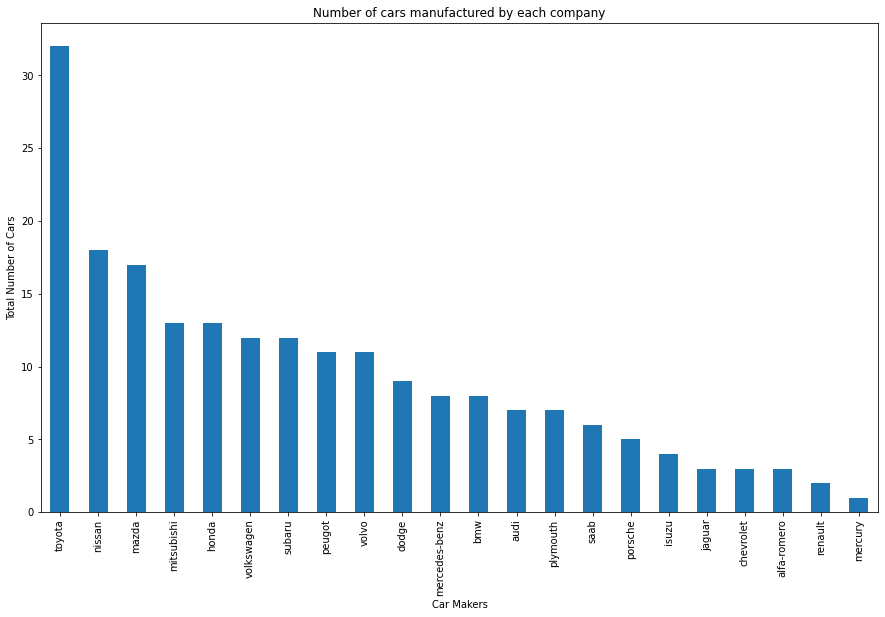

In [35]:
# total cars manufactured
total_cars = auto_df['make'].value_counts()
print(total_cars)

# plot the total car manufactured
total_cars.plot(kind='bar', figsize=(15,9))
plt.title("Number of cars manufactured by each company")
plt.xlabel("Car Makers")
plt.ylabel("Total Number of Cars")

### **7. Find out the distribution of different fuel types**

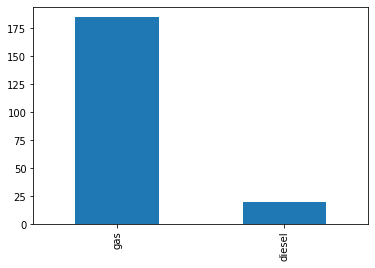

In [38]:
# plot the distribution of different fuel types
auto_df['fuel-type'].value_counts().plot(kind='bar')

### **8. Find out the range of prices for cars with two doors i.e Coupes**

make
mercedes-benz    36210.667969
jaguar           36000.000000
porsche          27761.826172
bmw              26238.333984
mercury          16503.000000
alfa-romero      15498.333008
saab             15013.333008
audi             14228.564453
isuzu            12127.564453
nissan           10876.777344
toyota           10562.000000
mazda             9956.111328
renault           9895.000000
mitsubishi        9597.888672
volkswagen        9331.250000
plymouth          8764.333008
dodge             8217.500000
honda             7465.750000
subaru            6591.333496
chevrolet         5723.000000
Name: price, dtype: float32


Text(0, 0.5, 'Car Manufacturers')

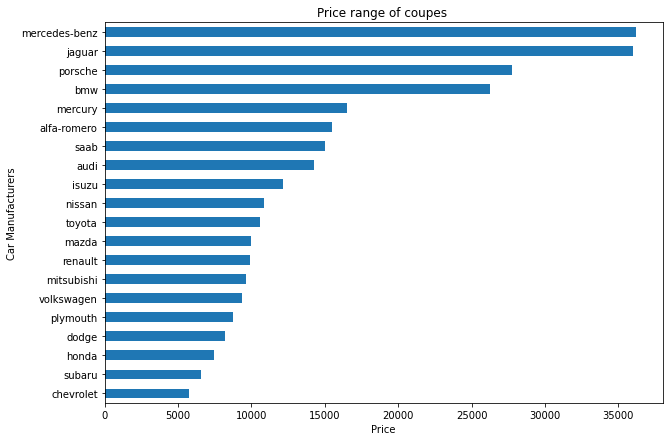

In [42]:
# find out cars with two doors
coupes = auto_df[auto_df['num-of-doors'] == 'two']
coupe_cars = coupes.groupby('make')
coupe_cars = coupe_cars['price'].mean()
range_coupes = coupe_cars.sort_values(ascending=False)
print(range_coupes)

# plot the prices of cars with two doors
range_coupes.plot(kind='barh', figsize=(10,7)).invert_yaxis()
plt.title('Price range of coupes ')
plt.xlabel('Price')
plt.ylabel('Car Manufacturers')

* From the plot we can infer that there are a variety of coupes available in the market, starting from luxury brands to the most affordable ones.

### **9. Find out which type of cars i.e body-style are the most affordable ones**

In [54]:
# find out which cars are the most affordable
car_bodies = auto_df[['make','body-style','price']]
car_type = car_bodies.groupby('body-style')
affordable = car_type['price'].mean()
print(affordable.sort_values(ascending=True))

body-style
hatchback      10050.289062
wagon          12371.959961
sedan          14433.659180
convertible    21890.500000
hardtop        22208.500000
Name: price, dtype: float32


* We can clearly see that hatchbacks are the most affordable type of cars followed by wagons.

### **10. Compare the prices between car manufacturers of fwd, rwd and awd/4wd**

drive-wheels
fwd     9310.818359
4wd    10570.570312
rwd    19671.421875
Name: price, dtype: float32


Text(0, 0.5, 'Price')

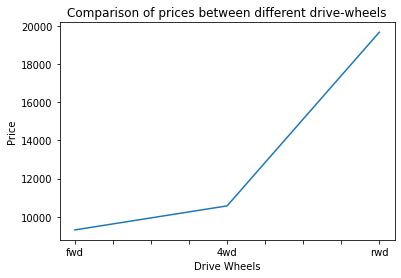

In [61]:
# find out prices of cars by its drive system
drive_system = auto_df[['make','drive-wheels','price']]
wheel_drive = drive_system.groupby('drive-wheels')
wheel_drive = wheel_drive['price'].mean()
print(wheel_drive.sort_values(ascending=True))

# plot the comparison of prices
wheel_drive.sort_values(ascending=True).plot()
plt.title("Comparison of prices between different drive-wheels")
plt.xlabel("Drive Wheels")
plt.ylabel('Price')

* As obvious forward wheel drive systems are the most affordable ones followed by 4 wheel drive and rear wheel drive systems being the costliest.